# Sales_Prediction_Using_Python

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the sales prediction dataset
data = pd.read_csv("codsoftsalespredictiondataset.csv")

In [8]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB
None


In [10]:
# Display the first few rows of the dataset
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [13]:
# Check for missing values
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
#no need to handle missing values as there are none

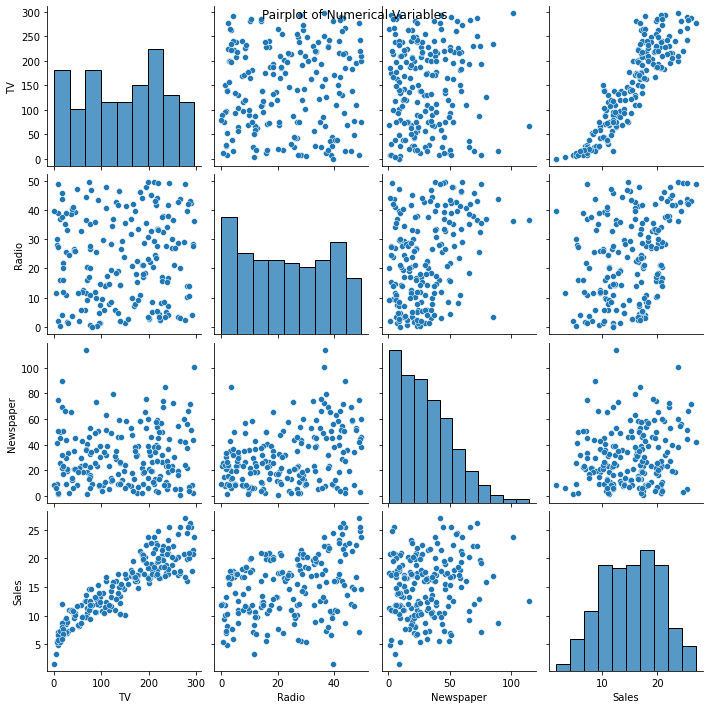

In [49]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data)
plt.suptitle("Pairplot of Numerical Variables")
plt.show()

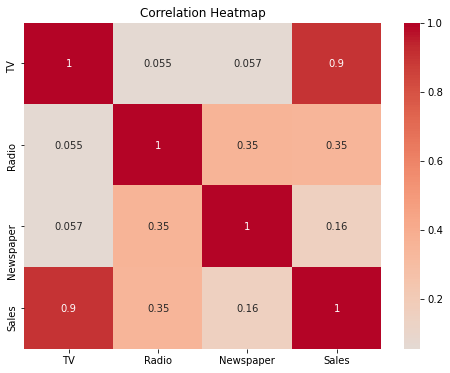

In [48]:
# Heatmap to visualize the correlation matrix of numerical variables
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


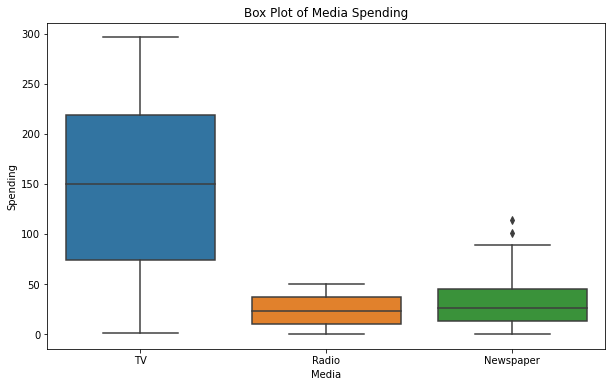

In [47]:
# Box plot to visualize the distribution of sales across different media channels
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(data[["TV", "Radio", "Newspaper"]]))
plt.title("Box Plot of Media Spending")
plt.xlabel("Media")
plt.ylabel("Spending")
plt.show()

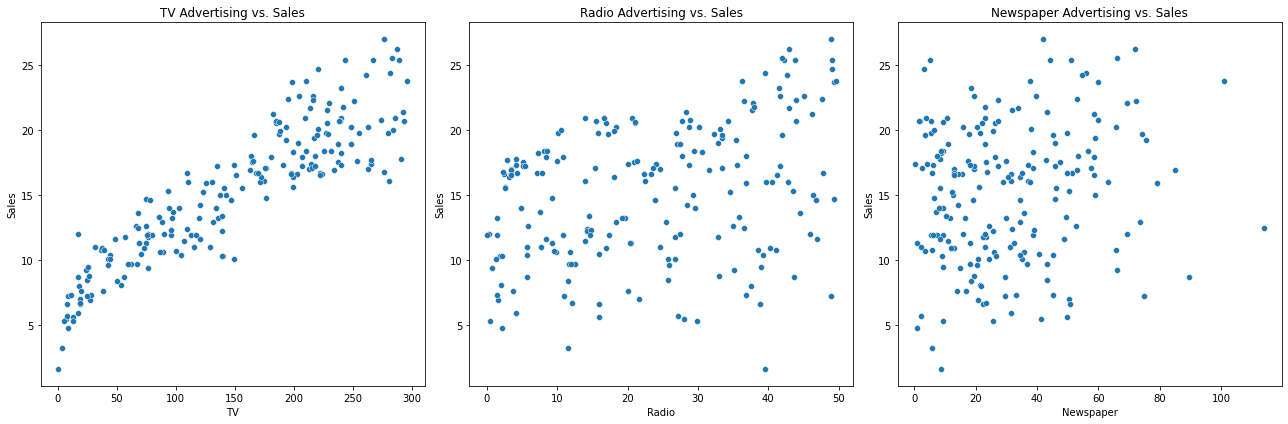

In [46]:
# Scatter plots to visualize relationships between sales and individual media channels
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.scatterplot(data=data, x="TV", y="Sales")
plt.title("TV Advertising vs. Sales")

plt.subplot(132)
sns.scatterplot(data=data, x="Radio", y="Sales")
plt.title("Radio Advertising vs. Sales")

plt.subplot(133)
sns.scatterplot(data=data, x="Newspaper", y="Sales")
plt.title("Newspaper Advertising vs. Sales")

plt.tight_layout()
plt.show()

In [16]:
# Define features and target variable
features = ["TV", "Radio", "Newspaper"]
target = "Sales"

In [19]:
# Create the feature matrix X and target vector y
X = data[features]
y = data[target]

In [21]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [23]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Initialize and train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
# Displaying the Predictions
for i, prediction in enumerate(y_pred):
    print(f"Test {i+1}: Predicted Sales - {prediction:.2f}, Actual Sales - {y_test.iloc[i]:.2f}")

Test 1: Predicted Sales - 17.30, Actual Sales - 16.90
Test 2: Predicted Sales - 22.48, Actual Sales - 22.40
Test 3: Predicted Sales - 19.77, Actual Sales - 21.40
Test 4: Predicted Sales - 6.78, Actual Sales - 7.30
Test 5: Predicted Sales - 22.96, Actual Sales - 24.70
Test 6: Predicted Sales - 13.47, Actual Sales - 12.60
Test 7: Predicted Sales - 22.59, Actual Sales - 22.30
Test 8: Predicted Sales - 9.58, Actual Sales - 8.40
Test 9: Predicted Sales - 16.89, Actual Sales - 16.50
Test 10: Predicted Sales - 16.79, Actual Sales - 16.10
Test 11: Predicted Sales - 7.50, Actual Sales - 11.00
Test 12: Predicted Sales - 10.33, Actual Sales - 8.70
Test 13: Predicted Sales - 17.35, Actual Sales - 16.90
Test 14: Predicted Sales - 5.13, Actual Sales - 5.30
Test 15: Predicted Sales - 11.50, Actual Sales - 10.30
Test 16: Predicted Sales - 16.90, Actual Sales - 16.70
Test 17: Predicted Sales - 6.55, Actual Sales - 5.50
Test 18: Predicted Sales - 17.79, Actual Sales - 16.60
Test 19: Predicted Sales - 11

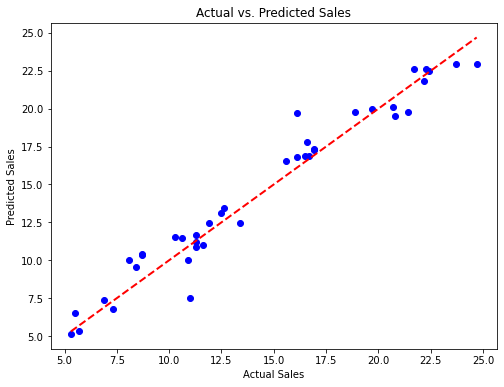

In [39]:
# Plotting the predicted vs. actual sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

In [36]:
# Generate a prediction analysis report
print("\nModel Evaluation Report:")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Model Evaluation Report:
Mean Squared Error: 1.4374328500000009
R-squared Score: 0.9534827934927883
